<a href="https://colab.research.google.com/github/akjieettt/data-science-final-project/blob/main/DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality and Chemical Composition

**Group Members**: Hrishi Kabra and Kiet Huynh

**Project Website**: https://akjieettt.github.io/data-science-final-project/

## Project Overview

Our project will investigate the relationship between chemical composition and wine quality, focusing on identifying which physicochemical properties most strongly predict wine quality and how these relationships differ between red and white wines. Our project aims to provide insights into wine production that could benefit winemakers and consumers. 

### Research Questions

**Primary Question**: *What chemical properties most strongly predict wine quality?*

**Secondary Question**: *How do chemical compositions differ between red and white wines, and what are the optimal chemical ranges for high-quality wines?*

### Background

The quality of a wine depends on its taste, aroma, and texture. These factors are influenced by its chemical makeup. Acidity, sugar, alcohol, and sulphur levels shape how a wine feels and tastes. For example, alcohol adds warmth and body, while acidity changes the freshness and balance of a wine. 

By studying these chemical properties, we can better understand what makes a high quality wine instead of just relying on human taste tests. 

The dataset we use comes from the Vinho Verde region in Portugal, known for both red and white wines. Each wine sample includes chemical measurements and a quality score (0–10). Analyzing how these chemical features relate to quality helps reveal which factors most strongly influence how a wine is rated.

### Motivation For This Project

Wine production is an art and science where chemical composition determines quality. Understanding these relationships through data science can provide valuable insights for:
- **Winemakers**: Optimizing production processes and chemical formulations
- **Consumers**: Making informed purchasing decisions
- **Industry**: Quality control and standardization

Key factors we're investigating:
- **Chemical Balance**: How different acidity components interact
- **Wine Type Differences**: Red vs white wine chemical requirements
- **Quality Predictors**: Which properties matter most for high ratings

### Collaboration Plan

**Team Coordination:**
- Set up a private GitHub repository to coordinate all code, share datasets, and track progress
- Each member works on separate branches to implement features, which are merged via pull requests after code review to ensure consistency

**Technologies Used:**
- Version Control: Git and GitHub for source code management and collaboration
- Development Environment: Visual Studio Code Live Share, Google Colab, and Jupyter Notebooks for data analysis and prototyping
- Communication Tools: Small Family Collaboration Hub for offline discussions, FaceTime for online discussions and Google Docs for shared notes

**Meeting Schedule:**
- Consistently meet offline 2 - 3 times per week for 1 - 3 hours per session to discuss progress, solve problems, and coordinate tasks
- Outside of scheduled meetings, we communicate asynchronously via iMessage to stay aligned and share updates

**Task Management:**
- Tasks are divided based on expertise and interest
- Progress is tracked via a shared progress table (in a spreadsheet) to ensure deadlines are met and responsibilities are clear

## Milestone 1: Initial ETL

### Data Sources

We are working with the [**Wine Quality**](https://archive.ics.uci.edu/dataset/186/wine+quality) from UC Irvine's Machine Learning Repository. The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine:

1. **winequality-red**: Data About Red Wines
   - **Source**: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality)
   - **Coverage**: Data about 1599 different Red Wines
   - **Output**: quality rating (0–10) assigned by tasters

2. **winequality-white**: Data About White Wines
   - **Source**: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality)
   - **Coverage**: Data about 4898 different White Wines
   - **Output**: quality rating (0–10) assigned by tasters

### Imports and Loading the Data

In [ ]:
!git clone https://github.com/akjieettt/data-science-final-project.git
%cd data-science-final-project/

In [81]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the wine datasets
df_reds = pd.read_csv("data/winequality-red.csv", sep=";")
df_whites = pd.read_csv("data/winequality-white.csv", sep=";")

# Add wine type identifiers for red and white
df_reds['type'] = 'red'
df_whites['type'] = 'white'

# Combine the red and white wine datasets into a single df
df = pd.concat([df_reds, df_whites], ignore_index=True)

# Adding a unique id to each wine
df['wine_id'] = df.index

# Printing the number of wines in each dataset
print(f"Total Number of Red Wines: {len(df_reds)}")
print(f"Total Number of White Wines: {len(df_whites)}") 
print(f"Total Number of Wines: {len(df)}")

df.head()

Total Number of Red Wines: 1599
Total Number of White Wines: 4898
Total Number of Wines: 6497


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,wine_id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,4


### Dataset Overview

We can see above that the dataset has roughly 6500 different wines. It also has 13 different columns: 
1. **fixed acidity**
2. **volatile acidity**
3. **citric acid**
4. **residual sugar**
5. **chlorides**
6. **free sulfur dioxide**
7. **total sulfur dioxide**
8. **density**
9. **pH**
10. **sulphates**
11. **alcohol**
12. **quality**
13. **type**
14. **wine_id**

Some More Information About The Dataset
- **Total Samples**: 6,497 wines
- **Red Wines**: 1,599 samples
- **White Wines**: 4,898 samples

### Red Wines and White Wines by Quality
Based on this information, we can count the red and white wines by quality

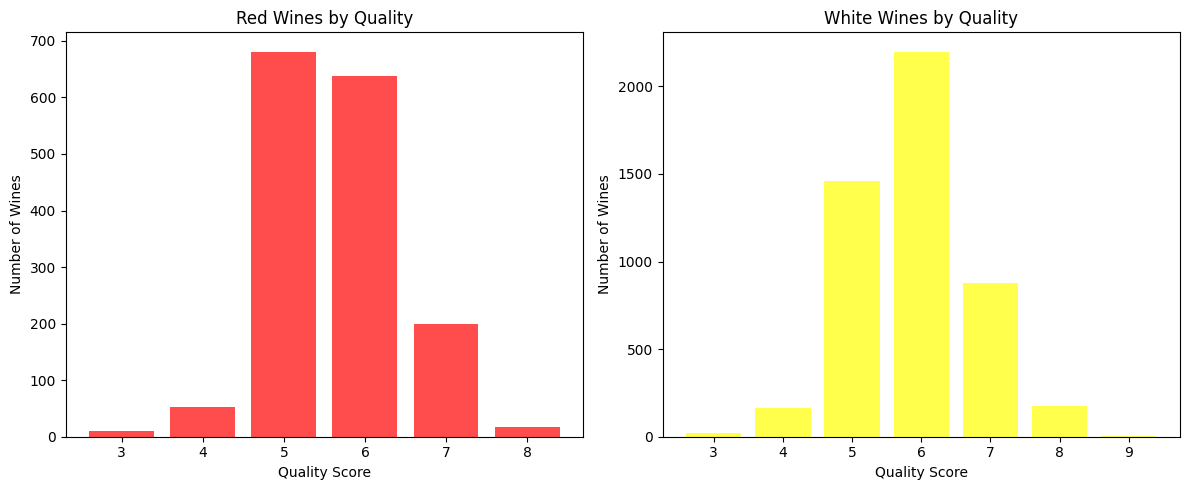

In [71]:
# Count the number of red and white wines by quality
red_quality_count = df_reds['quality'].value_counts().sort_index()
white_quality_count = df_whites['quality'].value_counts().sort_index()

# Create two separate bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Red wines bar chart
ax1.bar(red_quality_count.index, red_quality_count.values, color='red', alpha=0.7)
ax1.set_title('Red Wines by Quality')
ax1.set_xlabel('Quality Score')
ax1.set_ylabel('Number of Wines')

# White wines bar chart
ax2.bar(white_quality_count.index, white_quality_count.values, color='yellow', alpha=0.7)
ax2.set_title('White Wines by Quality')
ax2.set_xlabel('Quality Score')
ax2.set_ylabel('Number of Wines')

plt.tight_layout()
plt.show()

### Quality and Factors Affecting Quality
Taking a look at the bar chart above, we can see that the quality for the wines ranges from 3 to 9. The data is relatively symmetric and the average is around 5-6. There are many different chemical properties that can affect the quality. Below we are plotting a correlation matrix to see what factors affect the quality of red and white wines. 

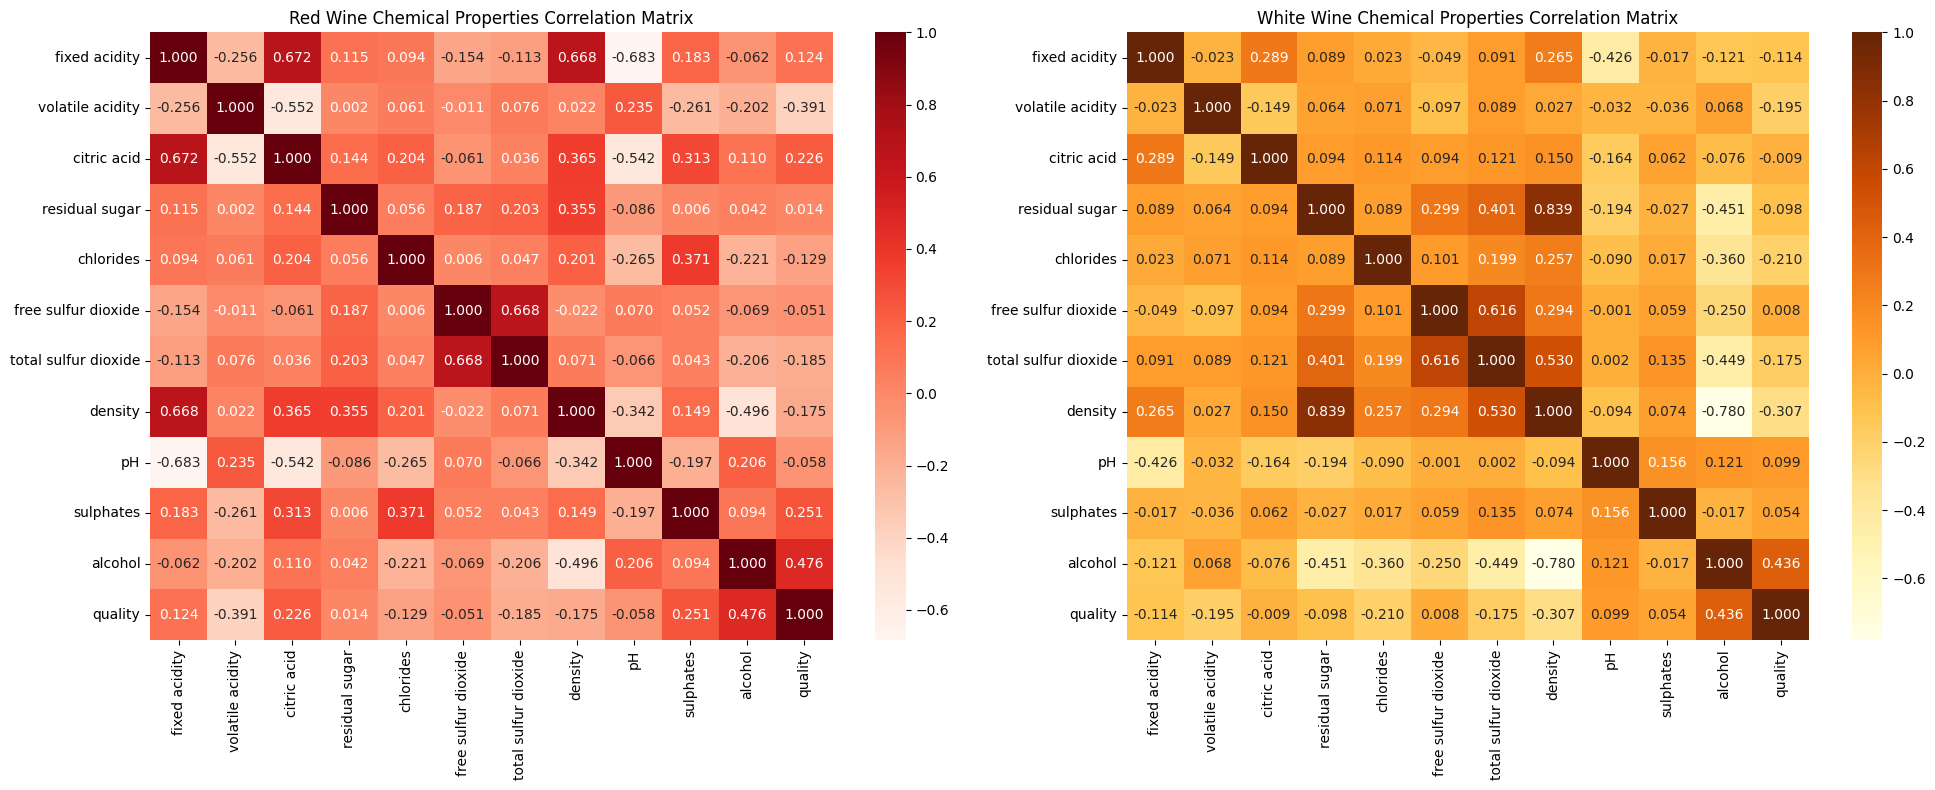

In [82]:
chemical_properties = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'] # The different chemical properties

# Correlation Heatmaps for Red and White Wines
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Calculate correlation matrices
red_corr_matrix = df_reds[chemical_properties + ['quality']].corr()
white_corr_matrix = df_whites[chemical_properties + ['quality']].corr()

# Red wine correlation heatmap
sns.heatmap(red_corr_matrix, annot=True, cmap='Reds', fmt='.3f', ax=axes[0])
axes[0].set_title('Red Wine Chemical Properties Correlation Matrix')

# White wine correlation heatmap
sns.heatmap(white_corr_matrix, annot=True, cmap='YlOrBr', fmt='.3f', ax=axes[1])
axes[1].set_title('White Wine Chemical Properties Correlation Matrix')

plt.tight_layout()
plt.show()

### Correlation Insights
From the above correlation plot we can infer that:
- **Alcohol** is a factor that affects the **Quality** of both Red and White Wine
- There is a strong positive correlation between **Alcohol** and **Quality**
- Red Wine: **Sulphates** and **Citric Acid** also has a positive correlation with **Quality**
- White Wine: **Density** and **Chlorides** have a negative correlation with **Quality** and 
- **Volatile Acidity**: This has a negative correlation with the **Quality** of both Red and White Wines; however, it has a strong negative correlation with the **Quality** of Red Wines and a weak negative correlation with the **Quality** of White Wines. 

### Visualizing Trends
Based on these insights, we can create a scatter plot to look at the trend between some of these variables and the **Quality** of wine. 

Starting with **Alcohol**, since it has a strong positive correlation with both, Red and White Wines.

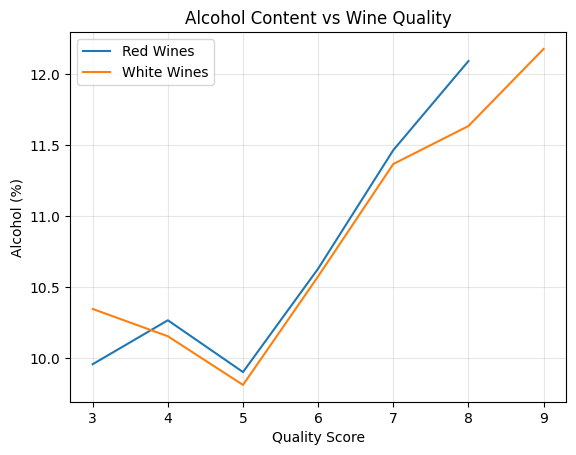

In [ ]:
red_quality_mean = df_reds.groupby('quality')['alcohol'].mean() # Grouping the Red Wines by Quality and finding the mean of Alcohol for each quality
white_quality_mean = df_whites.groupby('quality')['alcohol'].mean() # Grouping the White Wines by Quality and finding the mean of Alcohol for each quality

# Plotting the trend
plt.plot(red_quality_mean.index, red_quality_mean.values, label='Red Wines')
plt.plot(white_quality_mean.index, white_quality_mean.values, label='White Wines')
plt.title('Alcohol Content vs Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Alcohol (%)')
plt.legend()
plt.grid(True, alpha=0.3)

### Trends Between Alcohol Percentage and Quality
From the above graph we can see that:
- Red and White Wine have a follow a similar trend
- In general, as the alcohol percentage increases, so does the quality of the wine
- We can see a strong positive correlation here

In [ ]:
%shell jupyter nbconvert --to html /content/data-science-final-project/DataScienceProject.ipynb --output index.html

UsageError: Cell magic `%%shell` not found.
